# Treinamento

In [9]:
import numpy as np
import pickle  # Para salvar e carregar o modelo

# Função de pertinência fuzzy (gaussiana)
def gaussmf(x, mean, sigma):
    return np.exp(-((x - mean) ** 2) / (2 * sigma ** 2))

# Classe ANFIS para o modelo Neuro-Fuzzy
class ANFIS:
    def __init__(self, n_inputs, n_rules):
        self.n_inputs = n_inputs
        self.n_rules = n_rules
        self.means = np.random.uniform(15, 35, (n_rules, n_inputs))
        self.sigmas = np.random.uniform(5, 10, (n_rules, n_inputs))
        self.weights = np.random.uniform(-1, 1, n_rules)
        self.learning_rate = 0.01

    def forward(self, X):
        firing_strengths = np.zeros((X.shape[0], self.n_rules))
        for i in range(self.n_rules):
            mu = gaussmf(X[:, 0], self.means[i, 0], self.sigmas[i, 0]) * gaussmf(X[:, 1], self.means[i, 1], self.sigmas[i, 1])
            firing_strengths[:, i] = mu
        output = np.dot(firing_strengths, self.weights)
        return output, firing_strengths

    def train(self, X, y, epochs=100):
        for epoch in range(epochs):
            output, firing_strengths = self.forward(X)
            error = y - output
            self.weights += self.learning_rate * np.dot(firing_strengths.T, error)
            for i in range(self.n_rules):
                for j in range(self.n_inputs):
                    grad_mean = np.sum(error * firing_strengths[:, i] * (X[:, j] - self.means[i, j]) / (self.sigmas[i, j] ** 2))
                    grad_sigma = np.sum(error * firing_strengths[:, i] * ((X[:, j] - self.means[i, j]) ** 2) / (self.sigmas[i, j] ** 3))
                    self.means[i, j] += self.learning_rate * grad_mean
                    self.sigmas[i, j] += self.learning_rate * grad_sigma
            if (epoch + 1) % 10 == 0:
                mse = np.mean(error ** 2)
                print(f"Epoch {epoch+1}, Erro MSE: {mse}")

# Simulação dos dados de entrada
np.random.seed(42)
temperaturas = np.random.uniform(20, 40, 100)
umidades = np.random.uniform(30, 90, 100)
velocidades = 2.5 * temperaturas + 0.5 * umidades

X = np.column_stack((temperaturas, umidades))
y = velocidades

# Treinando o modelo e salvando os parâmetros
anfis_model = ANFIS(n_inputs=2, n_rules=3)
anfis_model.train(X, y, epochs=100)

# Salvando os parâmetros do modelo
with open('anfis_model_params.pkl', 'wb') as file:
    pickle.dump((anfis_model.means, anfis_model.sigmas, anfis_model.weights), file)
print("Modelo treinado e parâmetros salvos em 'anfis_model_params.pkl'")

Epoch 10, Erro MSE: 6122.401574986759
Epoch 20, Erro MSE: 2045.6016049436685
Epoch 30, Erro MSE: 1012.0712983115457
Epoch 40, Erro MSE: 638.4808641809802
Epoch 50, Erro MSE: 455.51527266103216
Epoch 60, Erro MSE: 352.09968584147987
Epoch 70, Erro MSE: 287.04103850510296
Epoch 80, Erro MSE: 242.6672069789505
Epoch 90, Erro MSE: 210.67903285374024
Epoch 100, Erro MSE: 186.73415010791908
Modelo treinado e parâmetros salvos em 'anfis_model_params.pkl'


# Predição

Parâmetros do modelo carregados para predição.
Temperatura: 24.744981749936002, Umidade: 44.63937860274501
Velocidade esperada: 84.18214367621252, Velocidade predita: 94.10823537001986
---
Temperatura: 26.507993963185356, Umidade: 88.38063328514673
Velocidade esperada: 110.46030155053676, Velocidade predita: 83.85776980013199
---
Temperatura: 34.92982810236048, Umidade: 53.58586348000563
Velocidade esperada: 114.11750199590402, Velocidade predita: 128.5545808368632
---
Temperatura: 32.992657980944294, Umidade: 83.5227933106268
Velocidade esperada: 124.24304160767414, Velocidade predita: 106.79222805460165
---
Temperatura: 36.98446820988356, Umidade: 67.86831755983577
Velocidade esperada: 126.39532930462678, Velocidade predita: 128.36786970832296
---
Temperatura: 33.15225784600687, Umidade: 77.6886782124989
Velocidade esperada: 121.72498372126663, Velocidade predita: 116.86567677747728
---
Temperatura: 31.36617206670943, Umidade: 60.15822558631153
Velocidade esperada: 108.49454295992933

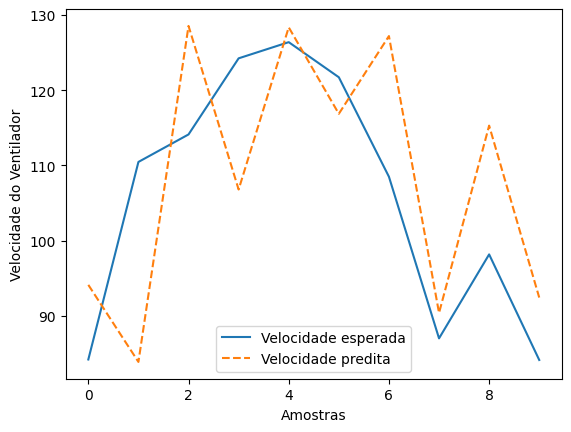

In [10]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

# Função de pertinência fuzzy (gaussiana)
def gaussmf(x, mean, sigma):
    return np.exp(-((x - mean) ** 2) / (2 * sigma ** 2))

# Classe ANFIS com método de carregamento
class ANFIS:
    def __init__(self, n_inputs, n_rules):
        self.n_inputs = n_inputs
        self.n_rules = n_rules
        self.means = None
        self.sigmas = None
        self.weights = None

    def load_params(self, means, sigmas, weights):
        self.means = means
        self.sigmas = sigmas
        self.weights = weights

    def forward(self, X):
        firing_strengths = np.zeros((X.shape[0], self.n_rules))
        for i in range(self.n_rules):
            mu = gaussmf(X[:, 0], self.means[i, 0], self.sigmas[i, 0]) * gaussmf(X[:, 1], self.means[i, 1], self.sigmas[i, 1])
            firing_strengths[:, i] = mu
        output = np.dot(firing_strengths, self.weights)
        return output, firing_strengths

# Carregar os parâmetros do modelo salvo
anfis_model = ANFIS(n_inputs=2, n_rules=3)
with open('anfis_model_params.pkl', 'rb') as file:
    means, sigmas, weights = pickle.load(file)
anfis_model.load_params(means, sigmas, weights)
print("Parâmetros do modelo carregados para predição.")

# Avaliando o modelo com novos dados de entrada
temperaturas_test = np.random.uniform(20, 40, 10)
umidades_test = np.random.uniform(30, 90, 10)
X_test = np.column_stack((temperaturas_test, umidades_test))
y_test = 2.5 * temperaturas_test + 0.5 * umidades_test  # Saída esperada

# Previsões do modelo
y_pred, _ = anfis_model.forward(X_test)

# Exibindo resultados
for i in range(len(X_test)):
    print(f"Temperatura: {X_test[i, 0]}, Umidade: {X_test[i, 1]}")
    print(f"Velocidade esperada: {y_test[i]}, Velocidade predita: {y_pred[i]}")
    print("---")

# Gráfico da comparação entre velocidade esperada e predita
plt.plot(y_test, label='Velocidade esperada')
plt.plot(y_pred, label='Velocidade predita', linestyle='--')
plt.xlabel('Amostras')
plt.ylabel('Velocidade do Ventilador')
plt.legend()
plt.show()